# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns 

In [ ]:
# Paso 1: Cargar el dataset
try:
    df_class = pd.read_csv('class.csv')
    print("Dataset 'class.csv' cargado exitosamente.")
    print("Primeras 5 filas de class.csv:")
    print(df_class.head())
    print("\nInformación general de class.csv:")
    df_class.info()
except FileNotFoundError:
    print("Error: 'class.csv' no encontrado. Asegúrate de que el archivo esté en la misma carpeta o proporciona la ruta correcta.")

print("-" * 50) # Separador para mejor visualización

# Cargar zoo.csv
try:
    df_zoo = pd.read_csv('zoo.csv')
    print("\nDataset 'zoo.csv' cargado exitosamente.")
    print("Primeras 5 filas de zoo.csv:")
    print(df_zoo.head())
    print("\nInformación general de zoo.csv:")
    df_zoo.info()
except FileNotFoundError:
    print("Error: 'zoo.csv' no encontrado. Asegúrate de que el archivo esté en la misma carpeta o proporciona la ruta correcta.")

Dataset 'class.csv' cargado exitosamente.
Primeras 5 filas de class.csv:
   Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 20       Bird   
2             3                                  5    Reptile   
3             4                                 13       Fish   
4             5                                  4  Amphibian   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  

Información general de class.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ---

In [ ]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)
try:
    df_class = pd.read_csv('class.csv')
    df_zoo = pd.read_csv('zoo.csv')
except FileNotFoundError:
    print("Asegúrate de que 'class.csv' y 'zoo.csv' estén en la misma carpeta.")

df_merged = pd.merge(df_zoo, df_class, left_on='class_type', right_on='Class_Number', how='left')

print("Primeras 5 filas del dataset fusionado:")
print(df_merged.head())

print("\nColumnas del dataset fusionado:")
print(df_merged.columns)

features = df_merged.drop(columns=[
    'animal_name',
    'class_type',
    'Class_Number', 
    'Number_Of_Animal_Species_In_Class', 
    'Class_Type', 
    'Animal_Names' 
])

X = features 
y = df_merged['class_type']

print(f"\nDimensiones de X (Características): {X.shape}")
print(f"Dimensiones de y (Variable Objetivo): {y.shape}")

print("\nPrimeras 5 filas de X (Características):")
print(X.head())

print("\nPrimeras 5 filas de y (Variable Objetivo):")
print(y.head())

print("\nLas características son binarias (0 o 1), por lo que no se requiere One-Hot Encoding ni Escalamiento.")
print("Hemos preparado X (características) e y (variable objetivo) para el modelado.")

Primeras 5 filas del dataset fusionado:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  ...  fins  legs  tail  domestic  catsize  class_type  \
0        1         1  ...     0     4     0         0        1           1   
1        1         1  ...     0     4     1         0        1           1   
2        1         1  ...     1     0     1         0        0           4   
3        1         1  ...     0     4     0         0        1           1   
4        1         1  ...     0     4     1         0        1           1   

   Class_Number  Number_Of_Animal_Species_In_C

Datos (X) cargados y listos para el Clustering Jerárquico.

Matriz de linkage calculada. Primeras 5 filas:
[[  0.   3.   0.   2.]
 [  1.   5.   0.   2.]
 [  2.   8.   0.   2.]
 [  4.  10.   0.   2.]
 [ 44. 104.   0.   3.]]
Dimensiones de la matriz de linkage: (100, 4)


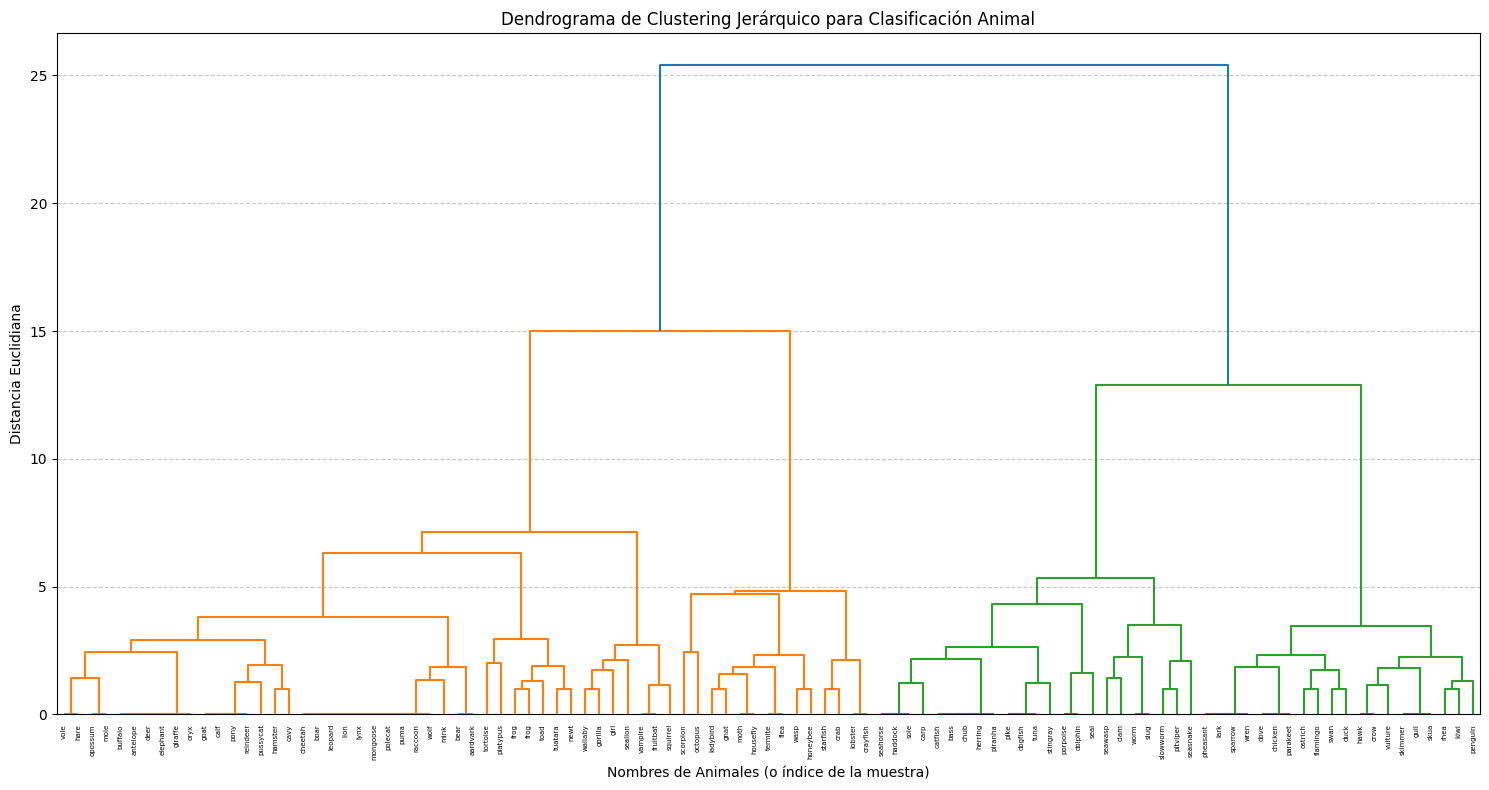


El dendrograma se ha generado. Usa el dendrograma para decidir el número de clusters.

Clusters asignados a cada animal (basado en 7 clusters):
[7 7 3 7 7 7 7 3 3 7 7 1 3 2 4 4 1 7 3 3 1 1 7 1 4 6 6 5 7 5 4 7 5 1 3 7 7
 1 3 4 4 1 4 1 7 7 4 7 7 7 7 4 6 4 7 7 1 1 1 1 3 3 2 6 7 7 3 7 7 7 7 1 4 3
 3 5 2 2 1 1 2 2 3 1 5 4 3 1 4 6 6 6 3 5 7 1 5 4 7 2 1]
Número de clusters encontrados: 7

Primeras 5 filas del dataset fusionado con los clusters jerárquicos predichos:
  animal_name  class_type Class_Type  predicted_cluster_hac
0    aardvark           1     Mammal                      7
1    antelope           1     Mammal                      7
2        bass           4       Fish                      3
3        bear           1     Mammal                      7
4        boar           1     Mammal                      7

Comparación de Clusters Jerárquicos Predichos vs. Clases Reales:
predicted_cluster_hac   1  2   3  4  5  6   7
class_type                                   
1                

In [ ]:
# Paso 3: Clustering Jerárquico
try:
    df_class = pd.read_csv('class.csv')
    df_zoo = pd.read_csv('zoo.csv')
    df_merged = pd.merge(df_zoo, df_class, left_on='class_type', right_on='Class_Number', how='left')
    
    # Definir X (características) de nuevo por si se ejecuta esta celda de forma independiente
    X = df_merged.drop(columns=[
        'animal_name',
        'class_type',
        'Class_Number',
        'Number_Of_Animal_Species_In_Class',
        'Class_Type',
        'Animal_Names'
    ])
    y = df_merged['class_type'] 
    
    print("Datos (X) cargados y listos para el Clustering Jerárquico.")

except NameError:
    print("Por favor, asegúrate de haber ejecutado el 'Paso 1: Cargar el dataset' y 'Paso 2: Preprocesamiento' primero.")
except FileNotFoundError:
    print("Error: Asegúrate de que 'class.csv' y 'zoo.csv' estén en la misma carpeta.")

linked_matrix = linkage(X, method='ward')

print("\nMatriz de linkage calculada. Primeras 5 filas:")
print(linked_matrix[:5])
print(f"Dimensiones de la matriz de linkage: {linked_matrix.shape}")


# 2. Visualizar el dendrograma
plt.figure(figsize=(15, 8))
dendrogram(
    linked_matrix,
    orientation='top', 
    labels=df_merged['animal_name'].values, 
    distance_sort='descending',
    show_leaf_counts=True 
)
plt.title('Dendrograma de Clustering Jerárquico para Clasificación Animal')
plt.xlabel('Nombres de Animales (o índice de la muestra)')
plt.ylabel('Distancia Euclidiana')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nEl dendrograma se ha generado. Usa el dendrograma para decidir el número de clusters.")

max_d = 4 

clusters_predicted = fcluster(linked_matrix, 7, criterion='maxclust') # Cortar para 7 clusters
print(f"\nClusters asignados a cada animal (basado en 7 clusters):")
print(clusters_predicted)
print(f"Número de clusters encontrados: {len(set(clusters_predicted))}")

# Añadir los clusters predichos al DataFrame fusionado para comparación
df_merged['predicted_cluster_hac'] = clusters_predicted

print("\nPrimeras 5 filas del dataset fusionado con los clusters jerárquicos predichos:")
print(df_merged[['animal_name', 'class_type', 'Class_Type', 'predicted_cluster_hac']].head())


print("\nComparación de Clusters Jerárquicos Predichos vs. Clases Reales:")
print(pd.crosstab(df_merged['class_type'], df_merged['predicted_cluster_hac']))

Datos (X) cargados y listos para Heatmap.

--- 1. Heatmap de las características por animal (Primeras 20 filas) ---


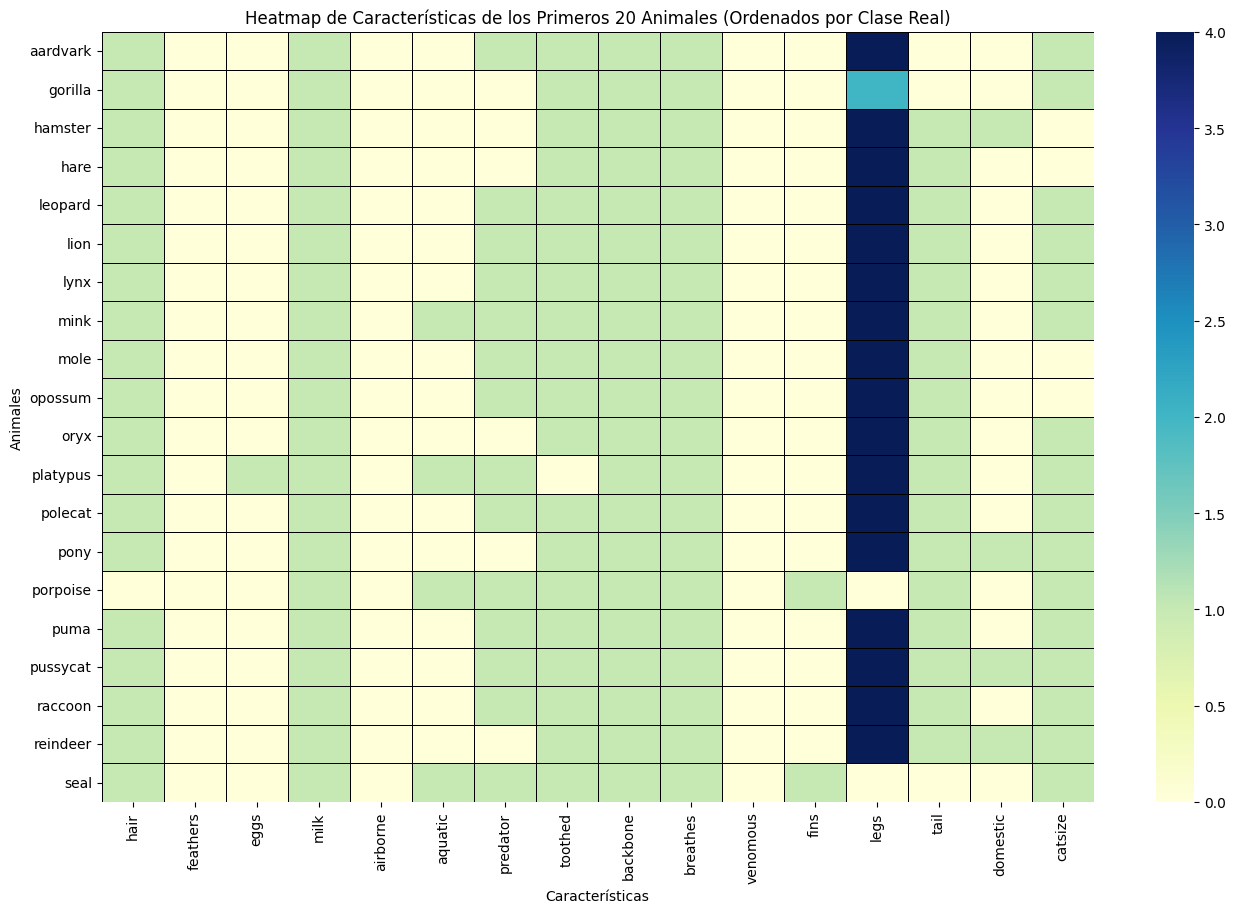


--- 2. Heatmap de todas las características por animal (todos los 101 animales) ---


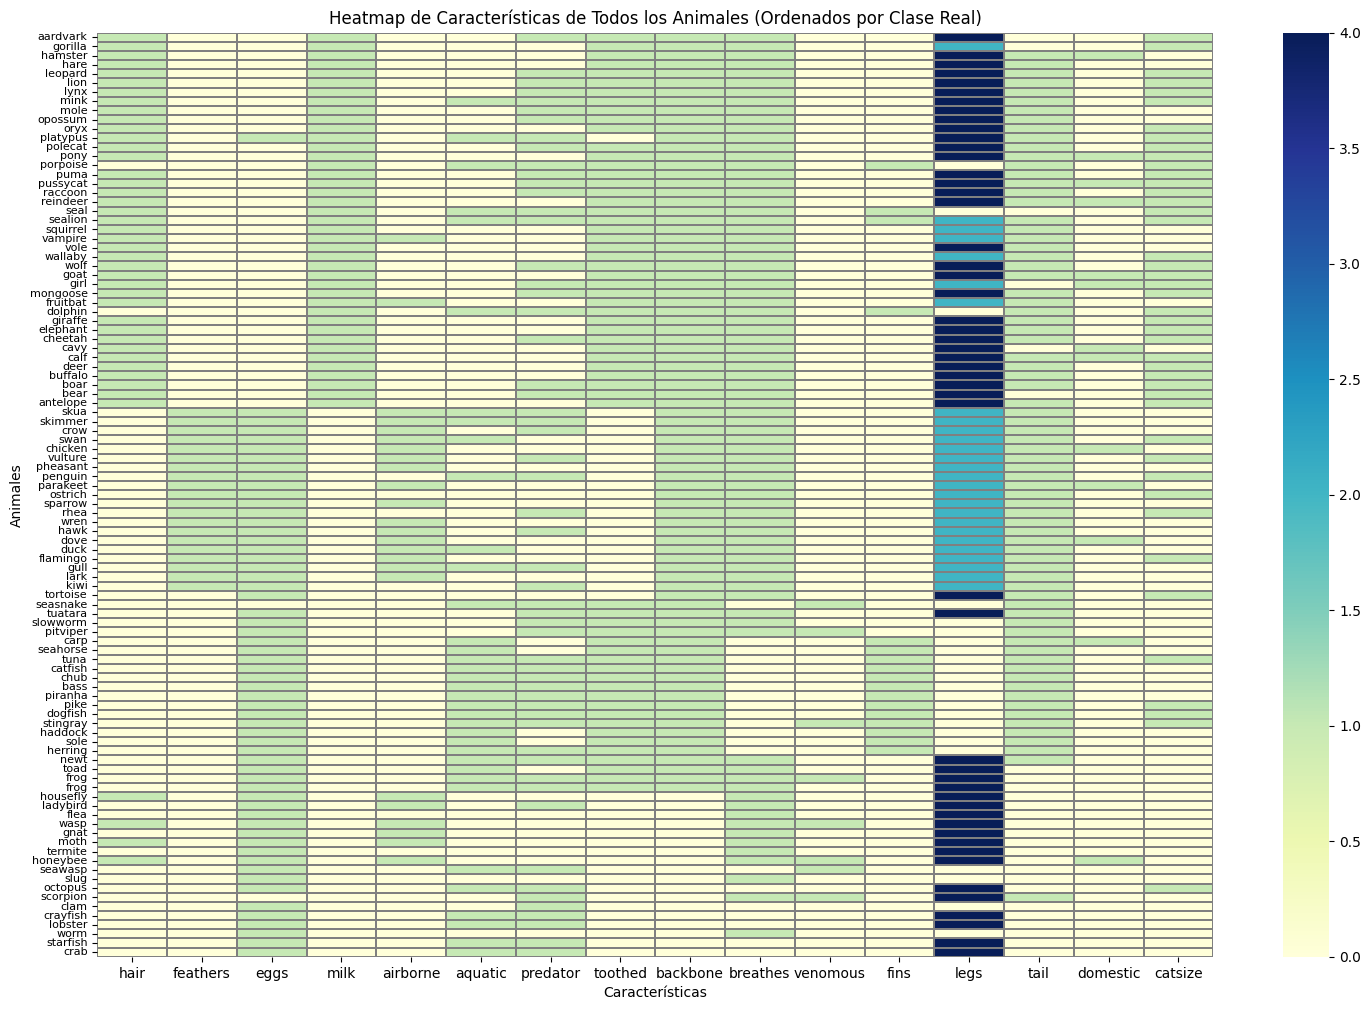


--- 3. Heatmap de la Matriz de Correlación de las Características ---


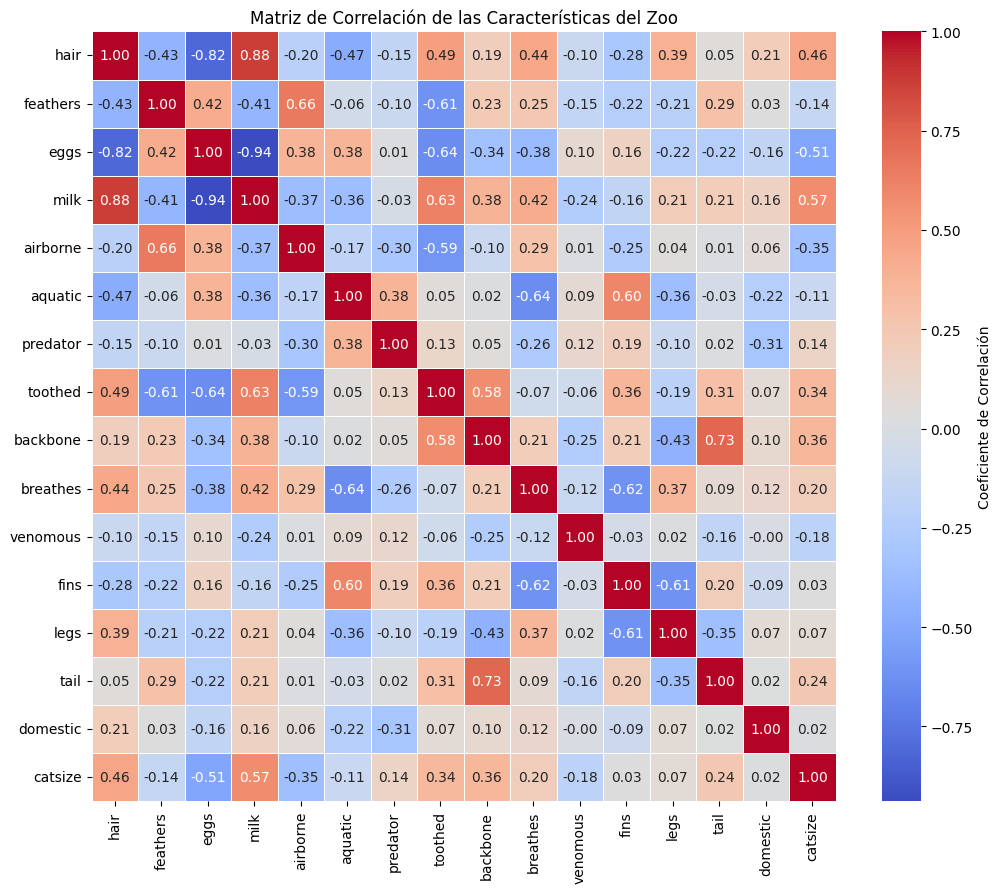


Heatmaps generados exitosamente.
El primer heatmap muestra la presencia/ausencia de características por animal.
El segundo heatmap es una versión más densa del anterior, mostrando todos los animales.
El tercer heatmap muestra las correlaciones entre las características. Los colores más claros indican correlaciones positivas fuertes, los más oscuros negativas fuertes.


In [ ]:
# Paso 4: Heatmap
try:
    df_class = pd.read_csv('class.csv')
    df_zoo = pd.read_csv('zoo.csv')
    df_merged = pd.merge(df_zoo, df_class, left_on='class_type', right_on='Class_Number', how='left')
    
    X = df_merged.drop(columns=[
        'animal_name', 'class_type', 'Class_Number', 
        'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names'
    ])
    y = df_merged['class_type']
    
    print("Datos (X) cargados y listos para Heatmap.")

except FileNotFoundError:
    print("Error: Asegúrate de que 'class.csv' y 'zoo.csv' estén en la misma carpeta.")
except NameError:
    print("Por favor, asegúrate de haber ejecutado los pasos anteriores para cargar y preprocesar los datos.")


print("\n--- 1. Heatmap de las características por animal (Primeras 20 filas) ---")


df_sorted_by_class = df_merged.sort_values(by='class_type')


X_sorted = df_sorted_by_class[X.columns]

plt.figure(figsize=(16, 10))
sns.heatmap(
    X_sorted.head(20), 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=.5, 
    linecolor='black', 
    yticklabels=df_sorted_by_class['animal_name'].head(20),
    fmt=".0f" 
)
plt.title('Heatmap de Características de los Primeros 20 Animales (Ordenados por Clase Real)')
plt.xlabel('Características')
plt.ylabel('Animales')
plt.show()

print("\n--- 2. Heatmap de todas las características por animal (todos los 101 animales) ---")
plt.figure(figsize=(18, 12))
sns.heatmap(
    X_sorted, 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=.1, 
    linecolor='gray',
    yticklabels=df_sorted_by_class['animal_name'], 
    robust=True 
)
plt.title('Heatmap de Características de Todos los Animales (Ordenados por Clase Real)')
plt.xlabel('Características')
plt.ylabel('Animales')
plt.yticks(fontsize=8) 
plt.show()


print("\n--- 3. Heatmap de la Matriz de Correlación de las Características ---")

correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación'} 
)
plt.title('Matriz de Correlación de las Características del Zoo')
plt.show()

print("\nHeatmaps generados exitosamente.")
print("El primer heatmap muestra la presencia/ausencia de características por animal.")
print("El segundo heatmap es una versión más densa del anterior, mostrando todos los animales.")
print("El tercer heatmap muestra las correlaciones entre las características. Los colores más claros indican correlaciones positivas fuertes, los más oscuros negativas fuertes.")

# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

El clustering jerárquico reveló que, basándose en las características binarias, el algoritmo pudo agrupar de manera muy efectiva clases de animales con atributos distintivos y mutuamente excluyentes (como aves, peces, anfibios e insectos), evidenciado por su alta pureza en clusters específicos; sin embargo, las clases con características más variadas o superpuestas, como mamíferos, reptiles e invertebrados, mostraron una mayor dispersión, resultando en clusters menos homogéneos al no alinearse tan perfectamente con las etiquetas de clase predefinidas.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Al observar el dendrograma, se pueden identificar 7 clusters claramente trazando una línea de corte horizontal que intercepte 7 ramas principales. Este número de agrupaciones se alinea con las clases reales de animales en el dataset.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Las características clave que impulsan la formación de los clusters son las binarias distintivas como feathers, fins, hair, y milk, que definen claramente grupos como aves, peces y mamíferos. La alta correlación entre estas características (ej., hair y milk; legs y fins opuestas) es fundamental para las agrupaciones observadas.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Sí, los resultados del clustering jerárquico tienen un fuerte sentido biológico, ya que agruparon de manera efectiva clases con características distintivas (aves, peces, anfibios, insectos). Las mezclas observadas en mamíferos, reptiles e invertebrados reflejan la mayor diversidad o solapamiento de atributos dentro de esos grupos biológicos.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

Para los datos binarios (0 o 1) como los de este dataset, la normalización de los datos tiene un impacto mínimo o nulo en el clustering jerárquico, ya que todas las características ya están en la misma escala uniforme, lo que evita que alguna característica domine las distancias entre puntos.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Se utilizó el método de linkage 'ward' porque minimiza la varianza dentro de los clústeres, lo que tiende a crear agrupaciones más compactas y equilibradas, adecuadas para datos binarios.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Otras técnicas de clustering aplicables son K-Means (eficiente, requiere k predefinido, útil para clusters esféricos), K-Modes (específico para datos categóricos/binarios), DBSCAN (encuentra clusters de formas arbitrarias y ruido, no necesita k), y Clustering Espectral (para clusters no convexos o complejos). 